This is Assignment 3 for Data Science Winter Project

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# importing data
wine_data = pd.read_csv('winequality_red.csv')
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# first part of assignment
wine_data['quality(binary)'] = (wine_data['quality']>=7).astype(int)
wine_data.drop('quality',axis=1,inplace=True)
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality(binary)
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [4]:
# part 2 of question
# checking for any nan values
for col in wine_data.columns:
    print(wine_data[col].isnull().values.any())
# therefore no values to delete

False
False
False
False
False
False
False
False
False
False
False
False


In [5]:
# correlation matrix
wine_data_corr = wine_data.corr(method='pearson')
wine_data_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality(binary)
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.199485


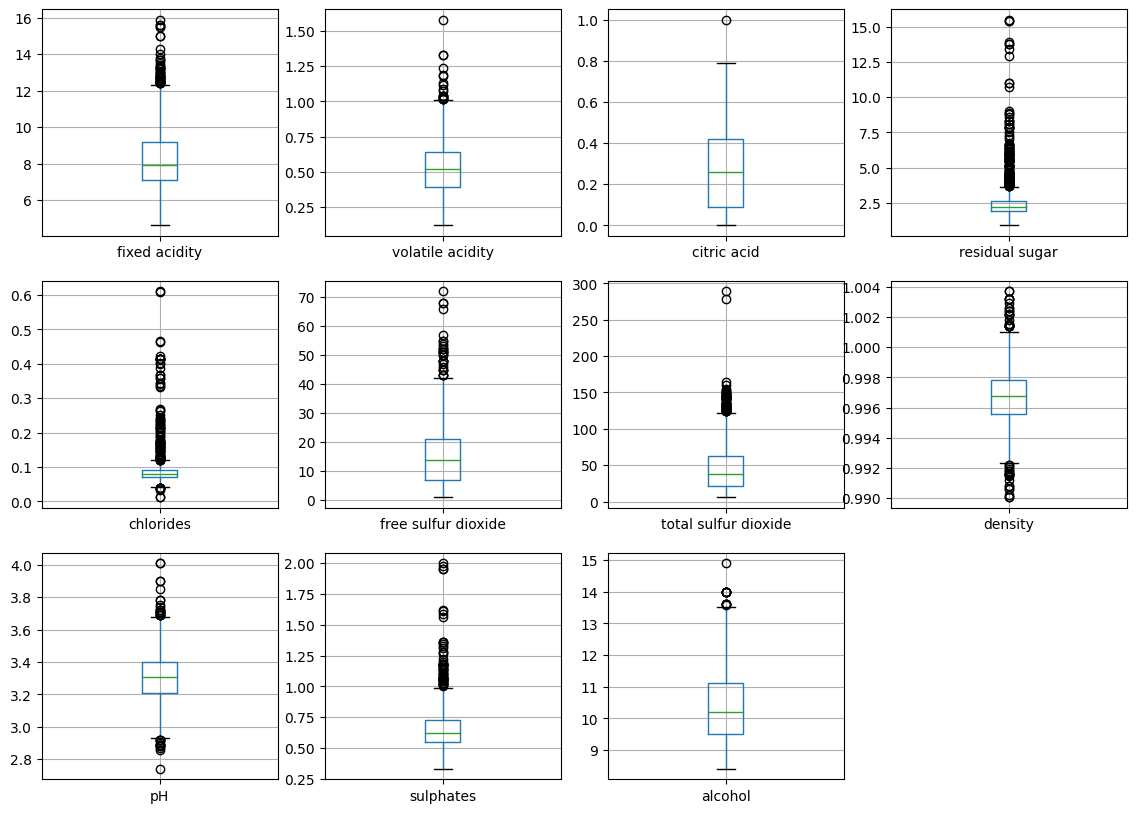

In [6]:
# boxplotting column wise to obtain possible outliers amount in each column
i=1
cols =  wine_data.columns
plt.figure(figsize=(14,10))
while(i<12):
    plt.subplot(3,4,i)
    wine_data.boxplot(column=cols[i-1])
    i=i+1
plt.show()

In [7]:
# defining function for outlier detection using IQR method
def detectOutlierIndex(x):
    Q1 = np.percentile(x,25,method='midpoint')
    Q3 = np.percentile(x,75,method='midpoint')
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    outlier = []
    for i in range(len(x)):
        if((x[i]>upper)or(x[i]<lower)):
            outlier.append(i)
    return outlier # gives index of outliers in x


In [8]:
# defined list for possible col containing outliers on observing from boxplot
possible_error_col = ['fixed acidity','volatile acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates']
# not taken pH and density as there aren't much abnormal values as seen from box plot
# density in range(0.99,1.004)
# pH in range(2.75,4)
indexes=[]
for i in possible_error_col:
    indexes = indexes+detectOutlierIndex(wine_data[i])
indexes = set(indexes)
wine_data = wine_data.drop((indexes))
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality(binary)
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


I have removed around 370 outliers

In [9]:
# defining target and variables for dataset and splitting in 0.75:0.25
target = wine_data['quality(binary)']
variables = wine_data.drop(columns = ['quality(binary)'])
from sklearn.model_selection import train_test_split
variables_train,variables_test,target_train,target_test = train_test_split(variables,target,train_size=0.75,random_state=1)

In [10]:
# normalizing the variables dataset
from sklearn.preprocessing import normalize
variables_train = normalize(variables_train)
variables_test = normalize(variables_test)

In [11]:
# implementing Decision Tree using sklearn library  
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
classifier = DecisionTreeClassifier()
classifier.fit(variables_train,target_train) 
target_pred = classifier.predict(variables_test)
total=0
count=0
for i in range(len(target_pred)):
    if(target_pred[i]==1):
        total=total+1
        if(target_pred[i]==target_test.iloc[i]):
            count=count+1
print("Total Predicted 1's:",total)
print("Actually Correct Predicted 1's:",count)
print("Accuracy:",metrics.accuracy_score(target_test, target_pred))
print("F1 score:",metrics.f1_score(target_test,target_pred))
print("Recall:",(metrics.f1_score(target_test,target_pred)*metrics.accuracy_score(target_test,target_pred))/(2*metrics.accuracy_score(target_test,target_pred)-metrics.f1_score(target_test,target_pred)))

Total Predicted 1's: 44
Actually Correct Predicted 1's: 26
Accuracy: 0.8961038961038961
F1 score: 0.6190476190476191
Recall: 0.47285187137585666


In [12]:
# implementing the Random Forest using sklearn library
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(variables_train,target_train)
target_rf_pred = rf_classifier.predict(variables_test)
total=0
count=0
for i in range(len(target_rf_pred)):
    if(target_rf_pred[i]==1):
        total=total+1
        if(target_rf_pred[i]==target_test.iloc[i]):
            count=count+1
print("Total Predicted 1's:",total)
print("Actually Correct Predicted 1's:",count)
print("Accuracy:",metrics.accuracy_score(target_test,target_rf_pred))
print("F1 score:",metrics.f1_score(target_test,target_rf_pred))
print("Recall:",(metrics.f1_score(target_test,target_rf_pred)*metrics.accuracy_score(target_test,target_rf_pred))/(2*metrics.accuracy_score(target_test,target_rf_pred)-metrics.f1_score(target_test,target_rf_pred)))

Total Predicted 1's: 21
Actually Correct Predicted 1's: 18
Accuracy: 0.9188311688311688
F1 score: 0.5901639344262294
Recall: 0.4346787268538269


The accuracy and F1 score above is a result of the biasness of dataset towards quality 0 and that's why when you compare the accuracy is about  0.9 showing good precision in guessing but the recall value is low around 0.5 which shows that out of the total number of quality index of 1 the model tells around 50% of them correctly. As the model is hugely biased towards quality less than 7 so the model doesn't get much data to get trained on and while splitting the major portion trained is under quality 7. 